**Name:** Stav Yosef

**ID:** 316298876


---


**Name:** Daniel Sabba

**ID:** 311500227


# Setup

In [16]:
import numpy as np
import pandas as pd
import random
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

np.random.seed(123)
random.seed(123)

# Data loading

In [ ]:
cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df_ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=cols, engine='python')
df_ratings['Rating'] = df_ratings['Rating'].astype(int)

In [ ]:
sparsity = round(df_ratings.shape[0] / (df_ratings.UserID.nunique() * df_ratings.MovieID.nunique()) * 100, 3)

print(f'#Users: {df_ratings.UserID.nunique()}')
print(f'#Movies: {df_ratings.MovieID.nunique()}')
print(f'#Ratings: {sparsity}%')

#Users: 6040
#Movies: 3706
#Ratings: 4.468%


# Sampling Test Set

In [ ]:
df_pivot = df_ratings.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)

user_ratings_mean = df_pivot.mean(axis=1).to_numpy().reshape((df_pivot.shape[0], 1))

In [ ]:
df_demeaned = df_pivot - user_ratings_mean

demeaned = df_demeaned.to_numpy()

In [ ]:
test_set_y_indices, test_set_x_indices = np.where(demeaned > 0)

random_indices = np.random.choice(test_set_y_indices.shape[0], 2500, replace=False)

In [ ]:
test_set_y_indices = test_set_y_indices[random_indices]
test_set_x_indices = test_set_x_indices[random_indices]

test_set = demeaned[test_set_y_indices, test_set_x_indices]

demeaned[test_set_y_indices, test_set_x_indices] = 0

# SVD, Predictions & Evaluations

In [ ]:
def make_preds(k: int) -> float:
    U, sigma, Vt = svds(demeaned, k=k)

    sigma = np.diag(sigma)

    predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean
    predicted_ratings[predicted_ratings < 0] = 0

    pred_test_set = predicted_ratings[test_set_y_indices, test_set_x_indices]

    rmse = np.sqrt(np.sum(np.power(test_set - pred_test_set, 2)) / test_set.shape[0])

    return rmse

In [ ]:
results_rmse = [make_preds(k=_k) for _k in range(1, 101)]

In [20]:
results_rmse = [2.678112347896473, 2.60084895412552, 2.5423931796922856, 2.496816251512275, 2.4662401580639655,
                2.439153112233709, 2.4179024190686973, 2.3948226425364956, 2.3806671202139413, 2.3627144513959,
                2.3562069118048337, 2.3464743896890194, 2.336399010918625, 2.32245638535816, 2.317203612944454,
                2.3085204127676597, 2.3005665044353103, 2.29494579607467, 2.291760184369575, 2.2851664085972754,
                2.2768152713340206, 2.2730798962392385, 2.268957912726846, 2.26605576332388, 2.2614295886884745,
                2.2593101203538652, 2.2567836394263976, 2.2533967691061725, 2.2495294729147903, 2.2450063018938526,
                2.240606024426414, 2.241260707844745, 2.2383586198579772, 2.2372960140572307, 2.2355170006568925,
                2.232393647630596, 2.2286225812006975, 2.227518430426923, 2.225045533126047, 2.2239676840986067,
                2.224644249048116, 2.223205307234897, 2.2227285599978113, 2.221861178987757, 2.2180509867947675,
                2.2191489238361455, 2.217009899650835, 2.216142862446261, 2.2154493282610153, 2.2164897005409316,
                2.218123760326967, 2.2200815194935455, 2.218293478679722, 2.2151657194753485, 2.2143101315279474,
                2.214596282951731, 2.2157362923552992, 2.2169864061837545, 2.218758660188567, 2.221349603137162,
                2.222891119147386, 2.2233117732777714, 2.225609897721576, 2.2282731252459653, 2.2292608118848607,
                2.2311856671165855, 2.231727949692348, 2.236253592454955, 2.2360012913660996, 2.238275705519876,
                2.239145792728078, 2.240641837458782, 2.245134184801606, 2.2463034690903956, 2.247809218738332,
                2.2476734397420244, 2.251407143237928, 2.2531528704980333, 2.2551263119308924, 2.255007160823915,
                2.256520605396784, 2.256628787766542, 2.2580394257214214, 2.256741800583133, 2.2590243193721458,
                2.2623205486361004, 2.264379252976996, 2.267854068926989, 2.267110093328832, 2.2685736007652904,
                2.272219104917249, 2.27329185005307, 2.276791163841956, 2.279070364235457, 2.2823025729803206,
                2.28319402656006, 2.2860678847922173, 2.2896398010596135, 2.2904078652087536, 2.2924090479331314]
                
results_rmse = np.array(results_rmse)

In [21]:
print('Best k:', np.argmin(results_rmse) + 1)

Best k: 55


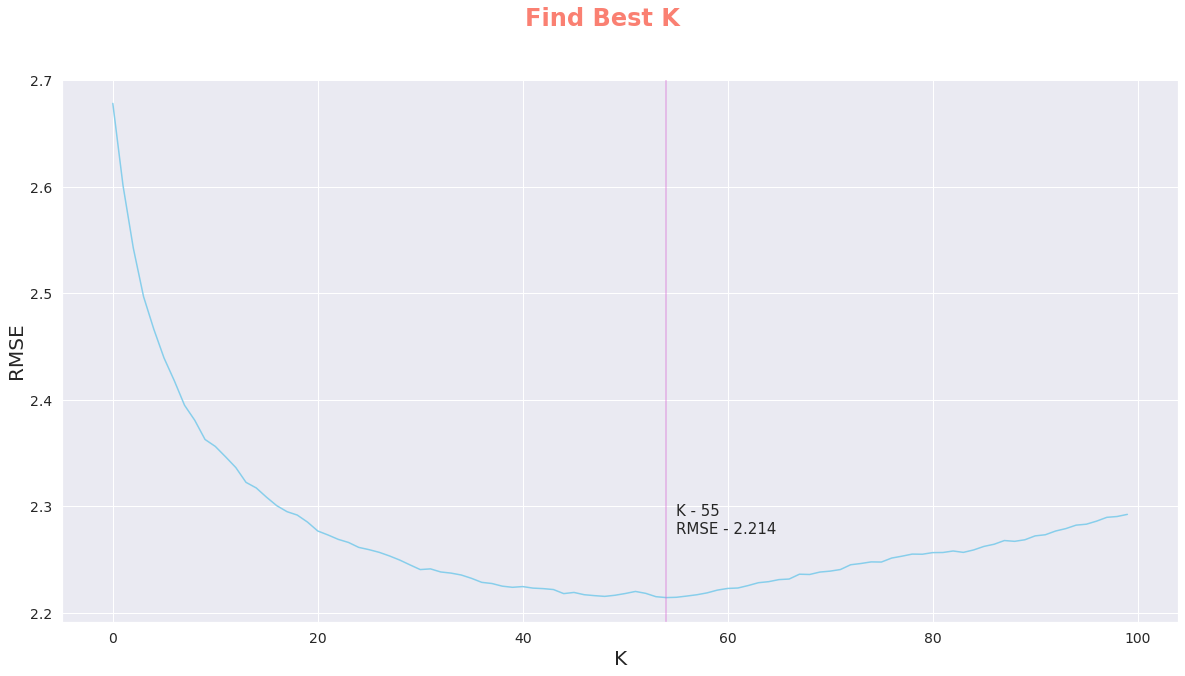

In [22]:
plt.rcParams["figure.figsize"] = (20, 10)

plt.suptitle('Find Best K', fontsize=24, fontweight='bold', color='salmon')
plt.plot(results_rmse, color='skyblue')

loc_x = np.argmin(results_rmse)
loc_y = results_rmse.mean()

plt.axvline(x=loc_x, color='orchid', alpha=0.5)
text = f'K - {loc_x + 1}\nRMSE - {round(results_rmse[loc_x], 3)}'
plt.text(x=loc_x + 1, y=loc_y, s=text, fontsize=15)

plt.xlabel("K", fontsize=20)
plt.ylabel("RMSE", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Discussion

# Matrix Factorization

In [2]:
def calc_rmse(_pred: np.ndarray, _actual: np.ndarray) -> float:
    pred = _pred.copy()
    actual = _actual.copy()

    non_zero_indices = actual.nonzero()
    _pred = pred[non_zero_indices].flatten()
    _actual = actual[non_zero_indices].flatten()

    mse = np.power(_pred - _actual, 2).mean()
    return np.sqrt(mse)

In [3]:
import numpy as np

class MF:
    def __init__(self,
                 train_matrix: np.ndarray,
                 k_factors: int,
                 reg: float):
        """
        Params
        ======
        train_matrix: (ndarray)
            User x Item train_matrix with corresponding data (ratings)

        k_factors: (int)
            Number of latent factors to use in our train_matrix.
            K must be smaller than user's features AND item's features

        reg: (float)
            Regularization for user & item (latent and biases).
        """

        self.train_matrix = train_matrix
        self.num_users, self.num_items = train_matrix.shape

        # initialize latent vectors
        self.k_factors = k_factors
        scale = 1.0 / k_factors
        self.user_vec_latent = np.random.normal(scale=scale, size=(self.num_users, self.k_factors))
        self.item_vec_latent = np.random.normal(scale=scale, size=(self.num_items, self.k_factors))

        self.reg = reg

        self.matrix_nonzero_row, self.matrix_nonzero_col = self.train_matrix.nonzero()

    def start_train(self, iter_array: list, test_matrix: np.ndarray, learning_rate: float):
        """
        Keep track of rmse as a function of training iterations.

        Params
        ======
        iter_array: (list)
            List of numbers of iterations to train for each step of the learning curve.
        test: (2D ndarray)
            Testing dataset (user x item).

        learning_rate : (float)
            Learning rate.
        """

        self.init_train(learning_rate)

        iter_array.sort()
        iterations_so_far = 0

        for (i, n_iterations) in enumerate(iter_array):
            print(f'Iteration: {n_iterations}')

            self.train(n_iterations - iterations_so_far)

            self.predictions = self.predict_all()

            self.train_rmse_result += [calc_rmse(self.predictions, self.train_matrix)]
            self.test_rmse_result += [calc_rmse(self.predictions, test_matrix)]

            print('Train rmse: ' + str(self.train_rmse_result[-1]))
            print('Test rmse: ' + str(self.test_rmse_result[-1]))

            iterations_so_far = n_iterations

        print("Done!")
        print(f'Train rmse:\n{self.train_rmse_result}')
        print(f'Test rmse:\n{self.test_rmse_result}')

    def init_train(self, learning_rate: float):
        self.test_rmse_result = []
        self.train_rmse_result = []

        self.learning_rate = learning_rate
        self.user_bias = np.zeros(self.num_users)
        self.item_bias = np.zeros(self.num_items)
        self.global_bias = 0

    def train(self, n_iterations: int):
        for i in range(1, n_iterations + 1):
            if i % 10 == 0:
                print(f'\t\tCurrent iteration: {i}/{n_iterations}')

            self.sgd()

    def sgd(self):
        training_order = np.arange(len(self.matrix_nonzero_row))
        np.random.shuffle(training_order)

        for idx in training_order:
            u_idx = self.matrix_nonzero_row[idx]
            i_idx = self.matrix_nonzero_col[idx]
            prediction = self.predict(u_idx=u_idx, i_idx=i_idx)
            e = (self.train_matrix[u_idx, i_idx] - prediction)

            self.user_bias[u_idx] += self.learning_rate * (e - self.reg * self.user_bias[u_idx])
            self.item_bias[i_idx] += self.learning_rate * (e - self.reg * self.item_bias[i_idx])
            self.global_bias += self.learning_rate * (e - self.global_bias)

            u_v_l = self.user_vec_latent
            i_v_l = self.item_vec_latent
            u_add = self.learning_rate * (e * i_v_l[i_idx, :] - self.reg * u_v_l[u_idx, :])
            i_add = self.learning_rate * (e * u_v_l[u_idx, :] - self.reg * i_v_l[i_idx, :])

            u_v_l[u_idx, :] += u_add
            i_v_l[i_idx, :] += i_add

    def predict_all(self) -> np.ndarray:
        preds = np.zeros((self.user_vec_latent.shape[0], self.item_vec_latent.shape[0]))

        for u_idx in range(self.user_vec_latent.shape[0]):
            for i_idx in range(self.item_vec_latent.shape[0]):
                preds[u_idx, i_idx] = self.predict(u_idx, i_idx)

        return preds

    def predict(self, u_idx: int, i_idx: int) -> float:
        pred = self.global_bias + self.user_bias[u_idx] + self.item_bias[i_idx]
        pred += self.user_vec_latent[u_idx, :].dot(self.item_vec_latent[i_idx, :].T)
        return pred

In [30]:
def plot_results(train_rmse: np.ndarray, test_rmse: np.ndarray, k_factor: int):
    iter_array = np.arange(1, 101)
    
    plt.rcParams["figure.figsize"] = (20, 10)

    plt.suptitle(f'Latent Dimension - {k_factor}', fontsize=24, fontweight='bold', color='salmon')

    plt.plot(iter_array, train_rmse, color='lightgreen', label='Train Matrix')
    plt.plot(iter_array, test_rmse, color='skyblue', label='Test Matrix')
    plt.legend(loc='upper right', fontsize=16)

    loc_x = np.argmin(train_rmse)
    loc_y = train_rmse.mean()

    plt.axvline(x=iter_array[loc_x], color='orchid', alpha=0.5)
    text = f'Iteration - {iter_array[loc_x]}\nRMSE - {round(train_rmse[loc_x], 5)}'
    plt.text(x=iter_array[loc_x] + 1, y=loc_y, s=text, fontsize=15)

    loc_x = np.argmin(test_rmse)
    loc_y = test_rmse.mean()

    plt.axvline(x=iter_array[loc_x], color='orchid', alpha=0.5)
    text = f'Iteration - {iter_array[loc_x]}\nRMSE - {round(test_rmse[loc_x], 5)}'
    plt.text(x=iter_array[loc_x] + 1, y=loc_y, s=text, fontsize=15)

    plt.xlabel("Iterations", fontsize=20)
    plt.ylabel("RMSE", fontsize=20)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

## Test Matrix Size = 2500

### Main

In [31]:
np.random.seed(123)
random.seed(123)

In [32]:
cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df_ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=cols, engine='python')
df_ratings['Rating'] = df_ratings['Rating'].astype(int)

df_pivot = df_ratings.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)

train_matrix = df_pivot.to_numpy()

In [33]:
train_matrix.shape

(6040, 3706)

In [34]:
test_matrix_y_indices, test_matrix_indices = np.where(train_matrix > 0)

n = 2500
random_indices = np.random.choice(test_matrix_y_indices.shape[0], n, replace=False)

test_matrix_y_indices = test_matrix_y_indices[random_indices]
test_matrix_indices = test_matrix_indices[random_indices]

test_matrix = np.zeros(train_matrix.shape)
test_matrix[test_matrix_y_indices, test_matrix_indices] = train_matrix[test_matrix_y_indices, test_matrix_indices]

train_matrix[test_matrix_y_indices, test_matrix_indices] = 0

In [36]:
mf_sgd = MF(train_matrix=train_matrix, k_factors=20, reg=0.1)

iter_array = np.arange(1, 101)

mf_sgd.start_train(iter_array=iter_array, test_matrix=test_matrix, learning_rate=0.01)

Iteration: 1
Train rmse: 1.0108215564518372
Test rmse: 0.9982529903610471
Iteration: 2
Train rmse: 0.9470754647373587
Test rmse: 0.936001441836296
Iteration: 3
Train rmse: 0.936659685118713
Test rmse: 0.9318591994429267
Iteration: 4
Train rmse: 0.9273311221781659
Test rmse: 0.9244081437568465
Iteration: 5
Train rmse: 0.9243848652774864
Test rmse: 0.9233081736370203
Iteration: 6
Train rmse: 0.9168384576953941
Test rmse: 0.9187326868989516
Iteration: 7
Train rmse: 0.9027129655750309
Test rmse: 0.9076187564952745
Iteration: 8
Train rmse: 0.8978705671917493
Test rmse: 0.9043518703857106
Iteration: 9
Train rmse: 0.9118273829922986
Test rmse: 0.9220552957013046
Iteration: 10
Train rmse: 0.8843421408869071
Test rmse: 0.8951156626287543
Iteration: 11
Train rmse: 0.8756200597692971
Test rmse: 0.8867429484938747
Iteration: 12
Train rmse: 0.880795177093606
Test rmse: 0.8944355143182638
Iteration: 13
Train rmse: 0.8703710968733361
Test rmse: 0.8826053893098394
Iteration: 14
Train rmse: 0.880870180

In [37]:
mf_sgd = MF(train_matrix=train_matrix, k_factors=50, reg=0.1)

iter_array = np.arange(1, 101)

mf_sgd.start_train(iter_array=iter_array, test_matrix=test_matrix, learning_rate=0.01)

Iteration: 1
Train rmse: 1.0081074824404384
Test rmse: 0.990302546151525
Iteration: 2
Train rmse: 1.0033839613702902
Test rmse: 0.9986044893369517
Iteration: 3
Train rmse: 0.9395841640143333
Test rmse: 0.9333992845314774
Iteration: 4
Train rmse: 0.9231593169663218
Test rmse: 0.9209565827979083
Iteration: 5
Train rmse: 0.9149803568687668
Test rmse: 0.9150653452643203
Iteration: 6
Train rmse: 0.9318038549224704
Test rmse: 0.9389259476287396
Iteration: 7
Train rmse: 0.9126750813614419
Test rmse: 0.9158404189243188
Iteration: 8
Train rmse: 0.9043398550344298
Test rmse: 0.907088045273884
Iteration: 9
Train rmse: 0.9030327500836448
Test rmse: 0.9121133205324627
Iteration: 10
Train rmse: 0.8943817734801889
Test rmse: 0.9033932351904748
Iteration: 11
Train rmse: 0.8899296589737896
Test rmse: 0.899825322007705
Iteration: 12
Train rmse: 0.876639412484156
Test rmse: 0.8884758739844217
Iteration: 13
Train rmse: 0.8816946721025862
Test rmse: 0.8938239253024
Iteration: 14
Train rmse: 0.8649460478367

In [38]:
mf_sgd = MF(train_matrix=train_matrix, k_factors=100, reg=0.1)

iter_array = np.arange(1, 101)

mf_sgd.start_train(iter_array=iter_array, test_matrix=test_matrix, learning_rate=0.01)

Iteration: 1
Train rmse: 1.0024728785894832
Test rmse: 0.9868526055414177
Iteration: 2
Train rmse: 0.9515092091606158
Test rmse: 0.9434400362847567
Iteration: 3
Train rmse: 0.9599983366725692
Test rmse: 0.9567363676741563
Iteration: 4
Train rmse: 0.947387502982144
Test rmse: 0.9479683839423076
Iteration: 5
Train rmse: 0.9192112428508487
Test rmse: 0.9192525609565314
Iteration: 6
Train rmse: 0.9213980596722585
Test rmse: 0.9214822208489073
Iteration: 7
Train rmse: 0.9107072393109834
Test rmse: 0.9130237777499725
Iteration: 8
Train rmse: 0.9019426275692977
Test rmse: 0.9028189469940954
Iteration: 9
Train rmse: 0.9066751146633768
Test rmse: 0.9132666379704191
Iteration: 10
Train rmse: 0.8900225855888045
Test rmse: 0.897632228131232
Iteration: 11
Train rmse: 0.8969412833183125
Test rmse: 0.9060005727921198
Iteration: 12
Train rmse: 0.876441314005562
Test rmse: 0.8831082492505321
Iteration: 13
Train rmse: 0.8855238586029869
Test rmse: 0.8967710592296566
Iteration: 14
Train rmse: 0.872794708

### Results

In [39]:
train_rmse_k_20 = np.array(
    [1.0108215564518372, 0.9470754647373587, 0.936659685118713, 0.9273311221781659, 0.9243848652774864,
     0.9168384576953941, 0.9027129655750309, 0.8978705671917493, 0.9118273829922986, 0.8843421408869071,
     0.8756200597692971, 0.880795177093606, 0.8703710968733361, 0.880870180134388, 0.8604643790960316,
     0.8661655476289892, 0.8740549049282315, 0.8638271487402547, 0.8585034087248483, 0.8718732565981611,
     0.8745750769265721, 0.8594417284164646, 0.856771943193092, 0.8575678161846872, 0.8533364450082658,
     0.8520691351178525, 0.8468150027618295, 0.8436201412862139, 0.8445913059593395, 0.8544550642019569,
     0.8491456826898229, 0.8398429316777126, 0.8474965966519509, 0.8416941309511047, 0.845553221745869,
     0.840086509637874, 0.8423616972393223, 0.8476058220699045, 0.8446879773383787, 0.8416289798182354,
     0.8418070584241361, 0.8373318687089475, 0.8471738142249854, 0.8338655655674798, 0.8461263222613984,
     0.8355861924547958, 0.8444751936509582, 0.8373954806638922, 0.8399245045968211, 0.8367929475937498,
     0.8355879696479911, 0.8345430969461897, 0.8306336871130343, 0.8319277738807742, 0.8296138363540846,
     0.8353556896472144, 0.8290251477170715, 0.8522585354337499, 0.8291622382077372, 0.8393866596992178,
     0.8352331145855291, 0.8333211818078187, 0.8322997941945718, 0.8275874033667656, 0.8298587885488163,
     0.8345274514793154, 0.836202523642785, 0.8401757565539155, 0.8327187566308605, 0.837107275713877,
     0.8334458470191232, 0.8349151322675573, 0.8284657731729758, 0.8319787576536198, 0.8293776511052909,
     0.827447221918094, 0.8249603160540038, 0.8289596725219844, 0.830903113499418, 0.8430329927316391,
     0.8271480529404464, 0.8228316057584122, 0.8282485688939405, 0.8256917160418402, 0.8359778799503009,
     0.8236689040499481, 0.8268140062691082, 0.827185385482931, 0.8232110573302466, 0.8254598880415162,
     0.8211572761623982, 0.8380357772453374, 0.8371671503697548, 0.8352234262610587, 0.8327722710146804,
     0.8208150452731865, 0.8234700057910938, 0.8257995215770997, 0.8236131565972001, 0.8298219395257785])

test_rmse_k_20 = np.array(
    [0.9982529903610471, 0.936001441836296, 0.9318591994429267, 0.9244081437568465, 0.9233081736370203,
     0.9187326868989516, 0.9076187564952745, 0.9043518703857106, 0.9220552957013046, 0.8951156626287543,
     0.8867429484938747, 0.8944355143182638, 0.8826053893098394, 0.8981758300371572, 0.8740889491721879,
     0.8828351518224097, 0.8964106551127932, 0.881827458796999, 0.8763975172124897, 0.8923164084679461,
     0.8948797136154288, 0.8811054057135654, 0.8766146046219634, 0.880589644889853, 0.875483953757481,
     0.8694705870889169, 0.8650347772806235, 0.8629442839023844, 0.8683575672705798, 0.8779249006284541,
     0.8740136120197061, 0.8626001023598105, 0.8691213690522419, 0.8664434393632267, 0.8661592285531806,
     0.862468994217807, 0.8708141230277614, 0.8731589872859772, 0.8748966834813436, 0.8702130193339819,
     0.8670180095437765, 0.8648570497622109, 0.8731217815579257, 0.8646682393014878, 0.8742133361172348,
     0.8572178295846041, 0.8736771666884776, 0.8635402910607339, 0.8694810894925605, 0.8672239223239376,
     0.865300697355328, 0.8653559711579538, 0.8594999447336343, 0.8574648774632349, 0.8574412064061238,
     0.8662486648549831, 0.8574213833728915, 0.8838731469815246, 0.8591661977886988, 0.8698218065258971,
     0.8683696292532134, 0.8635280430640411, 0.865105167247614, 0.8571809690031381, 0.8618051490334192,
     0.8691358572751613, 0.872648677882055, 0.8706527260219685, 0.8661360297779568, 0.8680860311740585,
     0.8674999422659176, 0.8666597452591485, 0.8628095285406324, 0.8607355325640774, 0.8667759878182056,
     0.8602902726731991, 0.8594671737168883, 0.8608477988368612, 0.8679991061773136, 0.8789199994097614,
     0.8584442126398762, 0.853353034865788, 0.8667375180807815, 0.8595370226705146, 0.8741984605861475,
     0.8575665532421196, 0.863128124180198, 0.8618638549049138, 0.8589390913644644, 0.8580434072311639,
     0.8568902086716587, 0.8764625584841654, 0.8754428360986698, 0.8688818265410362, 0.8684755867007378,
     0.8520797337717123, 0.858805003258349, 0.8636741992383881, 0.8563336086030714, 0.868827590383874])

In [40]:
train_rmse_k_50 = np.array(
    [1.0081074824404384, 1.0033839613702902, 0.9395841640143333, 0.9231593169663218, 0.9149803568687668,
     0.9318038549224704, 0.9126750813614419, 0.9043398550344298, 0.9030327500836448, 0.8943817734801889,
     0.8899296589737896, 0.876639412484156, 0.8816946721025862, 0.8649460478367864, 0.8664514776517989,
     0.8714291961501063, 0.8816969704671239, 0.8632371280663234, 0.860578233815869, 0.8674692374580169,
     0.8690443606796113, 0.8564148889669891, 0.8634560361932824, 0.8643617575879865, 0.8566442260927947,
     0.8530565230283378, 0.8555594853481154, 0.852485364720636, 0.8532313967659775, 0.8542756124430124,
     0.8447257624509764, 0.8520763848189368, 0.8526876874652999, 0.8473889987559814, 0.8501946969485827,
     0.8450820776741081, 0.8456526277169625, 0.8558918998096012, 0.8425443507072166, 0.8460876816222932,
     0.8412197681284685, 0.8570646038281202, 0.8472955932372355, 0.8405644618580798, 0.8431625950706474,
     0.8399365962593565, 0.8419571096292295, 0.8374294471004446, 0.8329126546204458, 0.8386731249633999,
     0.8356278956620347, 0.8406984239573932, 0.8388564194667314, 0.8317994835115207, 0.8384218541568903,
     0.8308920302872506, 0.8329917308142306, 0.8375637938686947, 0.8332123210420729, 0.8345642494046075,
     0.8333985704047173, 0.8421901243863117, 0.8328950469229885, 0.8357145902810132, 0.831277453137496,
     0.8346191518125406, 0.8296560425898137, 0.8337797003969957, 0.8265769375618695, 0.8429258992806682,
     0.8294447576851965, 0.8259118073269197, 0.8261245132065343, 0.8290861630362244, 0.8241731035810593,
     0.8240007571477171, 0.8273609609050674, 0.8329609814475423, 0.8275929474199962, 0.8282167307568233,
     0.8228751431358056, 0.8311891318280246, 0.8238372411568619, 0.8282544636577274, 0.8281628212368859,
     0.8298145216642616, 0.8333854960317498, 0.8277289740599568, 0.8367434783462705, 0.836896178667114,
     0.8320850362028577, 0.8235247405407203, 0.8224053666028871, 0.8413136334814312, 0.823030570766901,
     0.8273308750638726, 0.8206522459534827, 0.8226911789135404, 0.8274931055293514, 0.8237676148073176])

test_rmse_k_50 = np.array(
    [0.990302546151525, 0.9986044893369517, 0.9333992845314774, 0.9209565827979083, 0.9150653452643203,
     0.9389259476287396, 0.9158404189243188, 0.907088045273884, 0.9121133205324627, 0.9033932351904748,
     0.899825322007705, 0.8884758739844217, 0.8938239253024, 0.8727513684253555, 0.8820896868345438, 0.8845138867758257,
     0.899139458787238, 0.8812350059897391, 0.8768880353163738, 0.8886797771553198, 0.8856628151935149,
     0.8723946823247678, 0.8799373179640962, 0.8815172465123734, 0.8750396101854129, 0.876474993541082,
     0.8766728003123587, 0.8696075991351925, 0.8761618215107199, 0.8756645622030781, 0.8657969138513092,
     0.8803058523990428, 0.8764939796985823, 0.8705571721773965, 0.876371859456348, 0.8660047076687767,
     0.8697710527015887, 0.8796350568679961, 0.8679931451030604, 0.8715690801042307, 0.8640069950892388,
     0.8797623137240539, 0.8754193131827995, 0.8655484270606995, 0.8698885378207158, 0.8692106784108564,
     0.8694638694655071, 0.8640461450476761, 0.8576683198623204, 0.8694081580471313, 0.8597815019852043,
     0.8703886550237945, 0.8688645133794148, 0.8624970279907352, 0.8666004828345124, 0.8597087072749873,
     0.8590582418310795, 0.8702823956906954, 0.8641741026059323, 0.8625155235535924, 0.8627952755431069,
     0.8709830053304796, 0.8633227512738058, 0.8659519023653443, 0.8604788533970952, 0.8683809588293642,
     0.8586524559096443, 0.86357140461695, 0.8562091460606827, 0.8794761517074063, 0.8601129760936783,
     0.8587600191598214, 0.8574613788233024, 0.8602985344870735, 0.8581182658653208, 0.8561984054243366,
     0.8621313536784337, 0.8645436560838785, 0.8613371946371511, 0.8625009850644201, 0.8563188835974305,
     0.8661471078581199, 0.8578630166285232, 0.8632031442848018, 0.8641746166447754, 0.8655463142677587,
     0.8684774360243769, 0.8676392013209497, 0.8704159747846401, 0.8714618948171007, 0.8686283418073911,
     0.8639998012055108, 0.8564327038304662, 0.8802426643000267, 0.857686381834913, 0.8607787611326545,
     0.8592144724830066, 0.8592676477589105, 0.8618815429379375, 0.8604865688700372])

In [41]:
train_rmse_k_100 = np.array(
    [1.0024728785894832, 0.9515092091606158, 0.9599983366725692, 0.947387502982144, 0.9192112428508487,
     0.9213980596722585, 0.9107072393109834, 0.9019426275692977, 0.9066751146633768, 0.8900225855888045,
     0.8969412833183125, 0.876441314005562, 0.8855238586029869, 0.8727947081859937, 0.8793748565532308,
     0.8668864278491119, 0.8717223440504219, 0.8687781974936719, 0.8641505427692473, 0.8677190084940624,
     0.8706729683159651, 0.8579402325641822, 0.865121199735444, 0.854690307030631, 0.853054166748104,
     0.8571785415254519, 0.8727186831169514, 0.8473530366232259, 0.8683827307877251, 0.8461798755916321,
     0.8556474768167618, 0.8482844328180945, 0.848698432342063, 0.8444423401998455, 0.8543856634145853,
     0.8411989721294066, 0.8442644331598711, 0.8436392446928968, 0.8474482932804267, 0.84763161901631,
     0.8386191166199519, 0.8416475943291406, 0.8462516853640488, 0.8394332275303901, 0.8388057102338435,
     0.8420334964358326, 0.8379865057484868, 0.8445906830610264, 0.845701887644019, 0.8388007964168408,
     0.8444154737018433, 0.835240701899783, 0.8411233332154073, 0.8347438964590291, 0.8317639533280089,
     0.8364845551785379, 0.833356164134439, 0.8311756251355995, 0.8370198467701971, 0.8316502655447056,
     0.835458862001199, 0.8310231758236388, 0.836717441862542, 0.8374116733947669, 0.8421163398226484,
     0.8288442966387147, 0.8466222814495824, 0.8272568744780007, 0.8320240674871461, 0.8338733746563154,
     0.8300292327237135, 0.8309595114706424, 0.8301895090021518, 0.8364813202265875, 0.8341078579379667,
     0.8379981068625039, 0.8309955570850485, 0.8411235493063156, 0.8297084255650724, 0.8270369225772004,
     0.8308024278119239, 0.8426871646885729, 0.8402223985589904, 0.8423993712803188, 0.8294692845919965,
     0.824513850133672, 0.8265059951610702, 0.8237109580687427, 0.8362073863201007, 0.8231533551570059,
     0.8272049520235677, 0.8238047408619199, 0.823551429404495, 0.8256296502742735, 0.8329737307163411,
     0.8294469359305694, 0.8233412277640365, 0.8210369341892138, 0.8308773913048433, 0.820376043091449])

test_rmse_k_100 = np.array(
    [0.9868526055414177, 0.9434400362847567, 0.9567363676741563, 0.9479683839423076, 0.9192525609565314,
     0.9214822208489073, 0.9130237777499725, 0.9028189469940954, 0.9132666379704191, 0.897632228131232,
     0.9060005727921198, 0.8831082492505321, 0.8967710592296566, 0.8861115995707372, 0.894916846966713,
     0.8770840890694445, 0.8874250971787936, 0.8862216830314396, 0.8774311821756283, 0.8857564665622139,
     0.8865818151301994, 0.8731820725831737, 0.8838050161402184, 0.8708361353377725, 0.8672589501386798,
     0.8762560856202725, 0.8916633119836428, 0.8631174450986502, 0.890573756148564, 0.8634748918757091,
     0.8769639972434757, 0.8669973419502948, 0.8682412056747135, 0.8630329898164818, 0.8740662588198468,
     0.8623223890707732, 0.8673511384328147, 0.8619523373067108, 0.8698462427248072, 0.8702152320343747,
     0.862411116309855, 0.8652364951347388, 0.8707802035213761, 0.8660514823436426, 0.8671366365730064,
     0.8635643980761006, 0.8619744340323313, 0.8688404537597529, 0.8750373670333984, 0.8646324698429808,
     0.87324697618944, 0.8598452506093254, 0.8681580127338617, 0.8588560784959182, 0.8606662638412275,
     0.8675192686111634, 0.8582265420955223, 0.8614596737434345, 0.8657640987306326, 0.8563421788914041,
     0.865528278056729, 0.8600120516332472, 0.8651166879348168, 0.8677874745708716, 0.8699128768480471,
     0.8590733611453961, 0.8797598837438785, 0.8574974784366112, 0.8646152493213705, 0.8664956562595031,
     0.8586889951395728, 0.864126425729013, 0.8640806392420562, 0.869362632159545, 0.8660990933996402,
     0.8729214119239486, 0.8649794129696475, 0.8750025547204099, 0.8635056734747414, 0.8616623485422336,
     0.8636804700481756, 0.8792938867533884, 0.876375218374205, 0.8777742508912125, 0.8656136254062377,
     0.8587370170394234, 0.8605883711838419, 0.8568561850079878, 0.8728592163415296, 0.8571916540257815,
     0.8598299617346739, 0.8571698455127018, 0.8586492221548151, 0.8602127937087759, 0.8669781402592642,
     0.8673782841022134, 0.8555663093583071, 0.8548253988516874, 0.8684488857130703, 0.8553453980601892])

#### Latent Dimension - 20

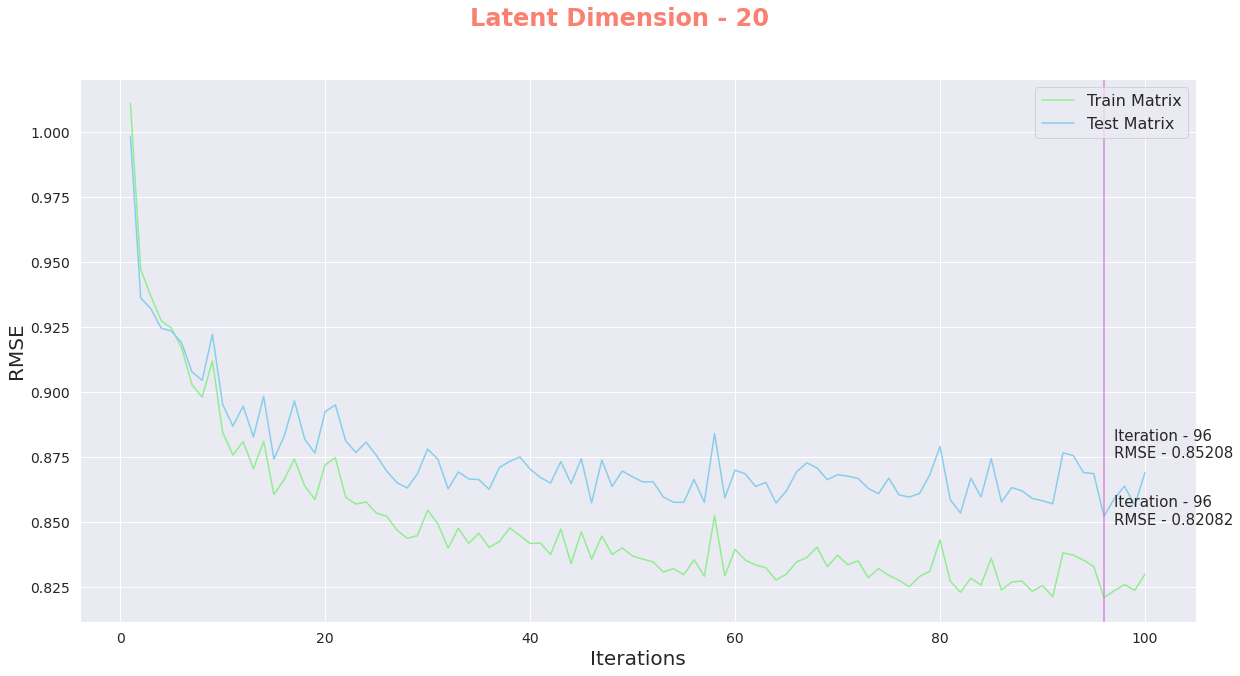

In [42]:
plot_results(train_rmse=train_rmse_k_20, test_rmse=test_rmse_k_20, k_factor=20)

#### Latent Dimension - 50

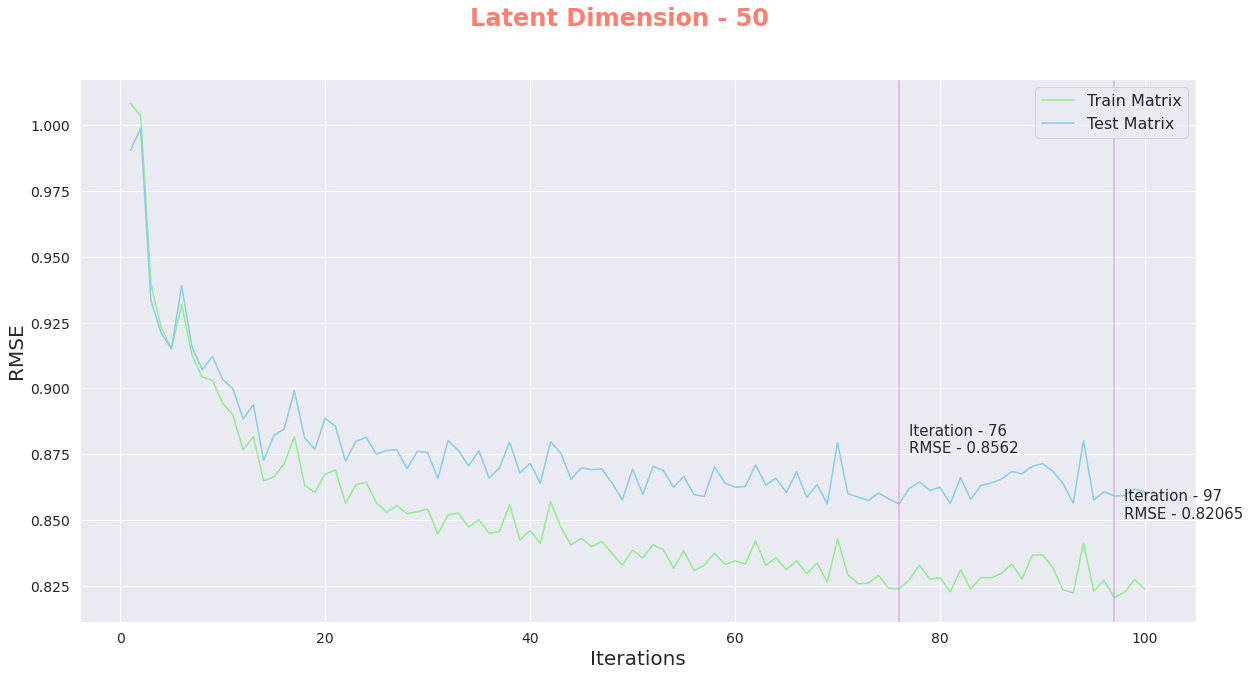

In [43]:
plot_results(train_rmse=train_rmse_k_50, test_rmse=test_rmse_k_50, k_factor=50)

#### Latent Dimension - 100

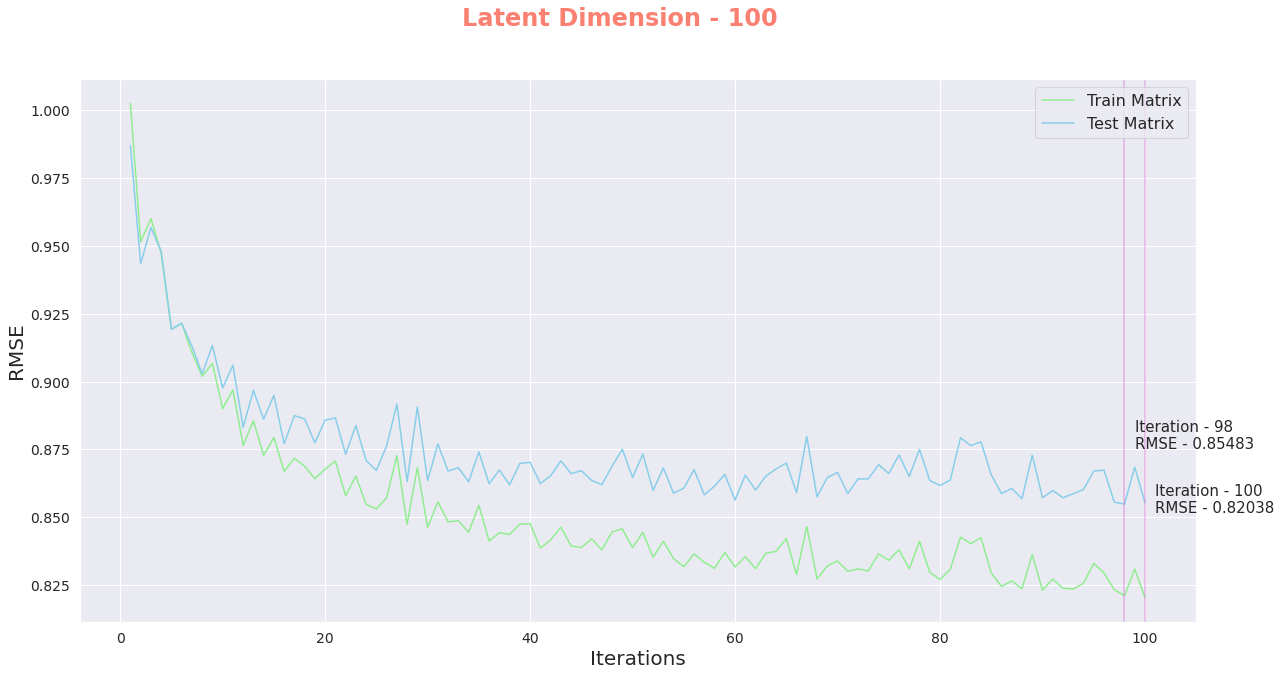

In [44]:
plot_results(train_rmse=train_rmse_k_100, test_rmse=test_rmse_k_100, k_factor=100)

## Test Matrix Size = 0.2 * Total Rating (200K ~)

### Main

In [ ]:
np.random.seed(123)
random.seed(123)

In [ ]:
cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df_ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=cols, engine='python')
df_ratings['Rating'] = df_ratings['Rating'].astype(int)

df_pivot = df_ratings.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)

train_matrix = df_pivot.to_numpy()

In [ ]:
train_matrix.shape

(6040, 3706)

In [ ]:
test_matrix_y_indices, test_matrix_indices = np.where(train_matrix > 0)

n = int(df_ratings.shape[0] * 0.2)
random_indices = np.random.choice(test_matrix_y_indices.shape[0], n, replace=False)

test_matrix_y_indices = test_matrix_y_indices[random_indices]
test_matrix_indices = test_matrix_indices[random_indices]

test_matrix = np.zeros(train_matrix.shape)
test_matrix[test_matrix_y_indices, test_matrix_indices] = train_matrix[test_matrix_y_indices, test_matrix_indices]

train_matrix[test_matrix_y_indices, test_matrix_indices] = 0

In [ ]:
mf_sgd = MF(train_matrix=train_matrix, k_factors=20, reg=0.1)

iter_array = np.arange(1, 101)

mf_sgd.start_train(iter_array=iter_array, test_matrix=test_matrix, learning_rate=0.01)

Iteration: 1
Train rmse: 1.0597298577997367
Test rmse: 1.0682313466436308
Iteration: 2
Train rmse: 0.9800197366048247
Test rmse: 0.990554287127084
Iteration: 3
Train rmse: 0.9448704029061189
Test rmse: 0.9560362260875289
Iteration: 4
Train rmse: 0.9456846102303721
Test rmse: 0.9574263686023988
Iteration: 5
Train rmse: 0.9542004106209694
Test rmse: 0.96595232601642
Iteration: 6
Train rmse: 0.9351578260963901
Test rmse: 0.9475885461188902
Iteration: 7
Train rmse: 0.911040572838667
Test rmse: 0.9233621863249207
Iteration: 8
Train rmse: 0.929549793217273
Test rmse: 0.9428424349320189
Iteration: 9
Train rmse: 0.8989866469185601
Test rmse: 0.9126899038953941
Iteration: 10
Train rmse: 0.8994729944154078
Test rmse: 0.9145144809061048
Iteration: 11
Train rmse: 0.8878591346724156
Test rmse: 0.9038032356308439
Iteration: 12
Train rmse: 0.8912688976116838
Test rmse: 0.9080110754052917
Iteration: 13
Train rmse: 0.8896023862722947
Test rmse: 0.9071440353804633
Iteration: 14
Train rmse: 0.87513477470

In [ ]:
mf_sgd = MF(train_matrix=train_matrix, k_factors=50, reg=0.1)

iter_array = np.arange(1, 101)

mf_sgd.start_train(iter_array=iter_array, test_matrix=test_matrix, learning_rate=0.01)

Iteration: 1
Train rmse: 1.0491856797810175
Test rmse: 1.0570248846796082
Iteration: 2
Train rmse: 0.9831605815361389
Test rmse: 0.9934734551657427
Iteration: 3
Train rmse: 0.9405353998365467
Test rmse: 0.9511572959038707
Iteration: 4
Train rmse: 0.9319177673011603
Test rmse: 0.9431138439324588
Iteration: 5
Train rmse: 0.9413835846697014
Test rmse: 0.9527342030684954
Iteration: 6
Train rmse: 0.9221591085378024
Test rmse: 0.9335277979173283
Iteration: 7
Train rmse: 0.9228986954894882
Test rmse: 0.9345563596306693
Iteration: 8
Train rmse: 0.9183078046832547
Test rmse: 0.9301912936761221
Iteration: 9
Train rmse: 0.9001881120474542
Test rmse: 0.9125206904636909
Iteration: 10
Train rmse: 0.9450400593291611
Test rmse: 0.958144309314618
Iteration: 11
Train rmse: 0.909530319391699
Test rmse: 0.923672976854991
Iteration: 12
Train rmse: 0.9087874972845379
Test rmse: 0.9236544720193509
Iteration: 13
Train rmse: 0.8755986426782776
Test rmse: 0.8916397506280639
Iteration: 14
Train rmse: 0.884961694

In [ ]:
mf_sgd = MF(train_matrix=train_matrix, k_factors=100, reg=0.1)

iter_array = np.arange(1, 101)

mf_sgd.start_train(iter_array=iter_array, test_matrix=test_matrix, learning_rate=0.01)

Iteration: 1
Train rmse: 1.0497742815141469
Test rmse: 1.0577148371034781
Iteration: 2
Train rmse: 0.9708913252316713
Test rmse: 0.9808945988113307
Iteration: 3
Train rmse: 0.9383342960738216
Test rmse: 0.9487878166043054
Iteration: 4
Train rmse: 0.9329201008810107
Test rmse: 0.9439573582904368
Iteration: 5
Train rmse: 0.9526148024270791
Test rmse: 0.9639072014155483
Iteration: 6
Train rmse: 0.9235516365699067
Test rmse: 0.9346887157611607
Iteration: 7
Train rmse: 0.9172992127338759
Test rmse: 0.9286997283266727
Iteration: 8
Train rmse: 0.9265105156740628
Test rmse: 0.9380723891898389
Iteration: 9
Train rmse: 0.9139099024455112
Test rmse: 0.9256823901502341
Iteration: 10
Train rmse: 0.89891728910222
Test rmse: 0.9114898232739339
Iteration: 11
Train rmse: 0.8962150333170926
Test rmse: 0.9096886781948602
Iteration: 12
Train rmse: 0.8910755892057993
Test rmse: 0.9054802454320932
Iteration: 13
Train rmse: 0.8957359684822596
Test rmse: 0.9109861037816066
Iteration: 14
Train rmse: 0.88192150

### Results

In [ ]:
train_rmse_k_20 = np.array(
    [1.0597298577997367, 0.9800197366048247, 0.9448704029061189, 0.9456846102303721, 0.9542004106209694,
     0.9351578260963901, 0.911040572838667, 0.929549793217273, 0.8989866469185601, 0.8994729944154078,
     0.8878591346724156, 0.8912688976116838, 0.8896023862722947, 0.8751347747065064, 0.8817790753243039,
     0.8722221949578458, 0.8746428661060686, 0.8576451018872137, 0.8623852439052743, 0.8638595930059402,
     0.8597740543338579, 0.8685006620776858, 0.8526299096134661, 0.8534564349210831, 0.8561170910794687,
     0.8515944377010856, 0.8521978221204863, 0.8504104868771158, 0.8526525238691354, 0.8407334822197019,
     0.8524573659050684, 0.8400802288683945, 0.8536813841393311, 0.845799542668453, 0.8449712985525818,
     0.8432624069514798, 0.8407914518769641, 0.8356192711862925, 0.8558581350385899, 0.8332162686402469,
     0.8335200347027438, 0.8498877399415121, 0.8508132369030028, 0.8372148343225319, 0.8352495851675452,
     0.8305988011837095, 0.8428097495891548, 0.8251897923231428, 0.833196569594778, 0.8338953954623308,
     0.8311610939419972, 0.828450658387431, 0.823713688876116, 0.8256387574159298, 0.8347712493243294,
     0.8270739518173994, 0.8354093473004911, 0.8360897809957533, 0.8292221622846614, 0.8363871204807637,
     0.8197372478409467, 0.8273026231644931, 0.8216427559667399, 0.8183525723023352, 0.8292164835044707,
     0.8248016807107886, 0.8284527600607171, 0.8251846200070754, 0.8167874578300818, 0.8220299338599232,
     0.8205736087563654, 0.8254854483760998, 0.8152738879379094, 0.8276474118098797, 0.818439826801095,
     0.8219595728888002, 0.8291604062878288, 0.8155732841789403, 0.8171518379463876, 0.8193927032274185,
     0.8247225816270326, 0.8126358599786094, 0.811720951175333, 0.83139844624465, 0.8165131231633037,
     0.8250920580902319, 0.8150170694583981, 0.811047960432284, 0.8238797796985153, 0.8176148250053819,
     0.8167325586477041, 0.8261971769011435, 0.8095064008042343, 0.8091655186554405, 0.8145654160890208,
     0.8192930380863999, 0.8220087695138469, 0.812887205441974, 0.8192831533575637, 0.8123596704744164])

test_rmse_k_20 = np.array(
    [1.0682313466436308, 0.990554287127084, 0.9560362260875289, 0.9574263686023988, 0.96595232601642,
     0.9475885461188902, 0.9233621863249207, 0.9428424349320189, 0.9126899038953941, 0.9145144809061048,
     0.9038032356308439, 0.9080110754052917, 0.9071440353804633, 0.893517220744946, 0.9007755599781664,
     0.8919761844873838, 0.8953118518336433, 0.8790545369376477, 0.8844419739785371, 0.8868096991277709,
     0.8836200925689732, 0.8927669178271136, 0.8772870293619549, 0.8789306075824986, 0.8817313020299689,
     0.8779695353671736, 0.8795156090336071, 0.877998716550723, 0.8808424602659412, 0.8695697239311253,
     0.8820786902485982, 0.8701933312480069, 0.884384629664187, 0.876943549513439, 0.8756901267364907,
     0.8757910084890222, 0.8732877947954466, 0.8685482993145782, 0.8891594550714733, 0.8674919864553635,
     0.8679360691887852, 0.8844612222518333, 0.8859796663274621, 0.8729048158199035, 0.8712662460131835,
     0.8671627614499694, 0.8799986357000597, 0.862364003584201, 0.8711984788006002, 0.8715847010624572,
     0.8695834311263005, 0.8673870894971049, 0.8632448106787373, 0.8655236610483009, 0.87437990640712,
     0.8675869701679888, 0.8760328144147623, 0.8769572027951604, 0.8706591516382035, 0.8783569357561252,
     0.8617854092738816, 0.8696091241145071, 0.8645275040313641, 0.8617327010938236, 0.8722151587351927,
     0.8680384552576608, 0.8723563838422957, 0.8693383950089293, 0.8611521405658888, 0.8668349561063872,
     0.8655616354249903, 0.8708957145522501, 0.8611627403311858, 0.8731243652852356, 0.8646568334280291,
     0.8683490070299748, 0.8754996064478402, 0.8628371653970848, 0.8644203727347075, 0.8670809823467156,
     0.8723304481866981, 0.8607539939805434, 0.8601820257230974, 0.8794490580349776, 0.8650208737849877,
     0.8734284744520707, 0.864157605455714, 0.8608531533939134, 0.8732399724192859, 0.8674655331998207,
     0.8668451793489524, 0.876049783610225, 0.8605451664923778, 0.8599174400644503, 0.8654968756139575,
     0.8705694473529835, 0.8736720430347114, 0.8647916841031712, 0.8713256012076785, 0.86440644488167])

In [ ]:
train_rmse_k_50 = np.array(
    [1.0491856797810175, 0.9831605815361389, 0.9405353998365467, 0.9319177673011603, 0.9413835846697014,
     0.9221591085378024, 0.9228986954894882, 0.9183078046832547, 0.9001881120474542, 0.9450400593291611,
     0.909530319391699, 0.9087874972845379, 0.8755986426782776, 0.8849616949196181, 0.8723825994379826,
     0.8773290362003386, 0.8894468486021372, 0.8738498480870456, 0.8660374934668785, 0.863964773536426,
     0.8737927768071766, 0.8587596800374839, 0.8634925746590668, 0.8822995365198308, 0.8631811678753101,
     0.8586396908934649, 0.8530785888890993, 0.8611041222603605, 0.8567915698986366, 0.8552097118698048,
     0.8437986484121266, 0.8476015484777808, 0.8438066752007715, 0.8495671488443394, 0.8431749545369133,
     0.8416898292772097, 0.85104321269325, 0.8455721910671241, 0.8404998546603285, 0.8374168028536504,
     0.8415805197491643, 0.8349675459814545, 0.8557007964240172, 0.8350189102871658, 0.8313927765071242,
     0.8303084629948959, 0.8288196580809237, 0.8362641867396864, 0.8284964055908335, 0.8304752241873363,
     0.8282632431992613, 0.8352535988481775, 0.8343961967769263, 0.8308989226498651, 0.8231070059629918,
     0.8215309336540572, 0.8223180053347808, 0.826994976505586, 0.8253329387839681, 0.8309213194405064,
     0.8277742680683281, 0.8313462798777623, 0.8241706547670304, 0.8246897486963002, 0.8212647367732357,
     0.8230538117780618, 0.8200892435825266, 0.8305994156026034, 0.8180874560950874, 0.8186293342089552,
     0.8269976395589419, 0.8143810760325152, 0.8237297396649074, 0.8142301736671438, 0.8184678295038347,
     0.8237750856127528, 0.82968538266028, 0.823786025321138, 0.8238620897309925, 0.8246474768558537,
     0.8187712440911871, 0.811519524427166, 0.8168698791653052, 0.8106427197137798, 0.815315749166882,
     0.8122163191287606, 0.8256252635080064, 0.8130326372434027, 0.8179967353837672, 0.8211542206544125,
     0.8164576202636084, 0.8112608321811838, 0.8090059459480614, 0.8085517305731902, 0.8097314031436426,
     0.8069736570059882, 0.8286430492521525, 0.8179742281543295, 0.8207718945774646, 0.8195674801436091])

test_rmse_k_50 = np.array(
    [1.0570248846796082, 0.9934734551657427, 0.9511572959038707, 0.9431138439324588, 0.9527342030684954,
     0.9335277979173283, 0.9345563596306693, 0.9301912936761221, 0.9125206904636909, 0.958144309314618,
     0.923672976854991, 0.9236544720193509, 0.8916397506280639, 0.9015351046011338, 0.8900950677595505,
     0.8955515286329914, 0.9088207458275575, 0.8940106102304934, 0.8869766139755519, 0.8855473073871447,
     0.8962992771986747, 0.8820605761011631, 0.8871316125136299, 0.9062893315673515, 0.8878559552011103,
     0.8841795691659146, 0.8789232000502648, 0.8878804116118859, 0.8839791053464879, 0.8832246936499322,
     0.8722715310110473, 0.8765335377948537, 0.872987306234255, 0.8793455730211307, 0.8735317101258467,
     0.8724757792785884, 0.8823942368393656, 0.8778179177039617, 0.8725064427809989, 0.870561268944334,
     0.8750573531625435, 0.8683217232458449, 0.8895243617486411, 0.8698420538568971, 0.8661643651493789,
     0.8659504104314687, 0.8650205233269898, 0.8729334453343128, 0.86512554172531, 0.8678760958059233,
     0.8659771100228735, 0.8736396562394642, 0.8729169482933551, 0.8701164924011762, 0.8626262170331273,
     0.8611425556953028, 0.8619134920300748, 0.8669843768369206, 0.8662380081737819, 0.8721892599780903,
     0.8694863399850455, 0.8733461593172643, 0.8663876551030248, 0.8672718637930863, 0.8646120303338197,
     0.8660130028733392, 0.8640010723827941, 0.8744887273012074, 0.8626749198235723, 0.8635828483605569,
     0.8715719348064509, 0.8594771891332519, 0.8687821943052578, 0.8603821617383486, 0.8647617022892018,
     0.8701373276352004, 0.8760153701596524, 0.8709273259060771, 0.8713643286073798, 0.8724015275286846,
     0.8663603290303262, 0.8593281325204019, 0.8655214897708069, 0.859437701293698, 0.8643449831043711,
     0.8617042411300351, 0.8749137856231611, 0.8629084537949769, 0.8680224883533767, 0.8710696330237949,
     0.8668546072338722, 0.8622919093696244, 0.8602990469187034, 0.8604091729845512, 0.8618381462615813,
     0.8594716676098385, 0.8803490867014417, 0.8700568058075384, 0.8736762277100171, 0.8723601517352528])

In [ ]:
train_rmse_k_100 = np.array(
    [1.0497742815141469, 0.9708913252316713, 0.9383342960738216, 0.9329201008810107, 0.9526148024270791,
     0.9235516365699067, 0.9172992127338759, 0.9265105156740628, 0.9139099024455112, 0.89891728910222,
     0.8962150333170926, 0.8910755892057993, 0.8957359684822596, 0.8819215011511644, 0.8874722046468839,
     0.8712469314381805, 0.8793574014144044, 0.8777952888076913, 0.8697169805067478, 0.8576491281786921,
     0.8579030890876862, 0.864477466676155, 0.854994802609693, 0.8595733227118322, 0.8571207539651816,
     0.8554987894253625, 0.8709376496345337, 0.8516528382349839, 0.8542143905564352, 0.8580518516054347,
     0.8606271872571148, 0.8794675929419784, 0.8439104059347357, 0.84825143674114, 0.8436008187013501,
     0.8477643631460333, 0.838271983638397, 0.8506184267213114, 0.8457620233446809, 0.8407054391681218,
     0.8352832012772677, 0.8339481897517196, 0.8454515486581651, 0.8332309397548299, 0.8476081650756341,
     0.8345089903692665, 0.8362162252050725, 0.8458416853260752, 0.8402333082498092, 0.8303829595820448,
     0.8443419297034379, 0.8393277255358382, 0.8357266066814959, 0.8261079817147066, 0.8329799464401675,
     0.8334610884895822, 0.8304970583335445, 0.8266297641751353, 0.8433446014586565, 0.8347994987812315,
     0.8234683369472809, 0.831283090445788, 0.8302271758604275, 0.8217954983306278, 0.8326073835837609,
     0.8222462991275092, 0.8226636883667328, 0.8230499644539567, 0.8332311034198379, 0.8225395041998227,
     0.8284505107539771, 0.8202702797524611, 0.8251197745026776, 0.8208905401071088, 0.8178229499446978,
     0.818674406336045, 0.8157199211711941, 0.8224905164262718, 0.8143799772896573, 0.8223609762837721,
     0.8181765560840317, 0.8310746460218924, 0.8300754915954384, 0.818354571754752, 0.8281082903527065,
     0.8178099920482769, 0.8122727953600686, 0.8282777711161343, 0.8186759934144306, 0.8143417859430555,
     0.8186657178481591, 0.8141888774773248, 0.814094012078229, 0.8170700094925425, 0.8167429042095053,
     0.8146934520818571, 0.8149732986421275, 0.815294887966695, 0.8140623509110375, 0.8119193975923061]
)

test_rmse_k_100 = np.array(
    [1.0577148371034781, 0.9808945988113307, 0.9487878166043054, 0.9439573582904368, 0.9639072014155483,
     0.9346887157611607, 0.9286997283266727, 0.9380723891898389, 0.9256823901502341, 0.9114898232739339,
     0.9096886781948602, 0.9054802454320932, 0.9109861037816066, 0.8979518445375729, 0.9044311462383673,
     0.8891075172682104, 0.8980397519697272, 0.8972776927492871, 0.8898327552687055, 0.8787047702637936,
     0.8794796369320438, 0.886786498239622, 0.8778682130181354, 0.882809842437807, 0.8812238260694925,
     0.8792871363751671, 0.8953232573068557, 0.8771010292733153, 0.8795767009076448, 0.8840072720695987,
     0.8875539307997805, 0.9062965184401235, 0.8717008866325506, 0.875631883863767, 0.8723054197914837,
     0.8767806973061049, 0.8682470040747274, 0.8807816096405058, 0.876196505003272, 0.8717982609020649,
     0.866562948272409, 0.8662022082705783, 0.8777255633814486, 0.8662833569431683, 0.8804825966169503,
     0.8678325636365226, 0.870387650633455, 0.8801374920922225, 0.8753218921410616, 0.8657981254820424,
     0.8800876042063177, 0.8752267999568384, 0.8723434940712875, 0.8633361781415644, 0.870172020319896,
     0.8712248736627901, 0.8687174192739571, 0.8657483058559372, 0.8819024767864616, 0.8745026253784547,
     0.8632152126755704, 0.8708393138979204, 0.8705872683911317, 0.8627676352510112, 0.8738635425389516,
     0.8633816245783692, 0.8646328711193507, 0.864710262857048, 0.8750868639631614, 0.8656055434619988,
     0.8710476873706416, 0.863670614833234, 0.8686914866000468, 0.8648534233671233, 0.8622995262829805,
     0.8628961028782953, 0.8601273999986352, 0.8678433436972974, 0.8595222970202759, 0.86772597057592,
     0.8646199940655488, 0.8768455281567595, 0.8761851270229555, 0.8654192947117298, 0.8753099512457472,
     0.8656464099452006, 0.8597858480979824, 0.8762366945051424, 0.8669029899153424, 0.863275016801015,
     0.8671765021195997, 0.8633088333304636, 0.8633402013197748, 0.8668609052058558, 0.8665878459494025,
     0.8645578749251697, 0.8655463545870506, 0.8658953779868225, 0.8654694698600319, 0.8633762802677674])

#### Latent Dimension - 20

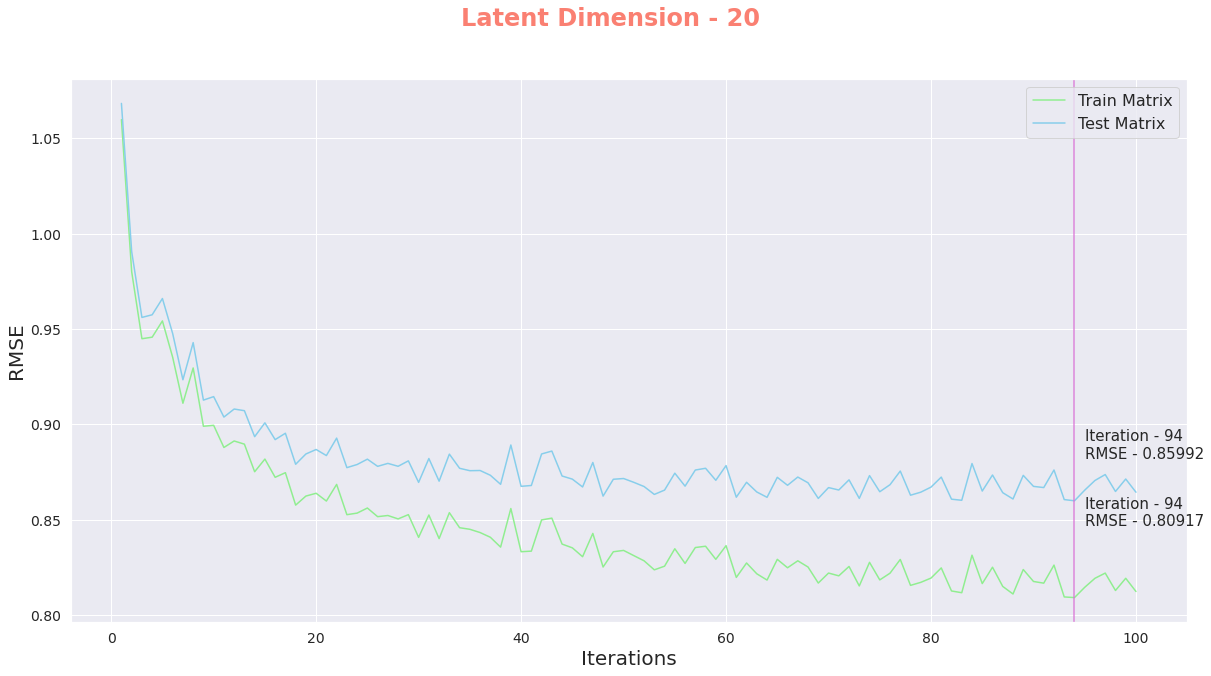

In [ ]:
plot_results(train_rmse=train_rmse_k_20, test_rmse=test_rmse_k_20, k_factor=20)

#### Latent Dimension - 50

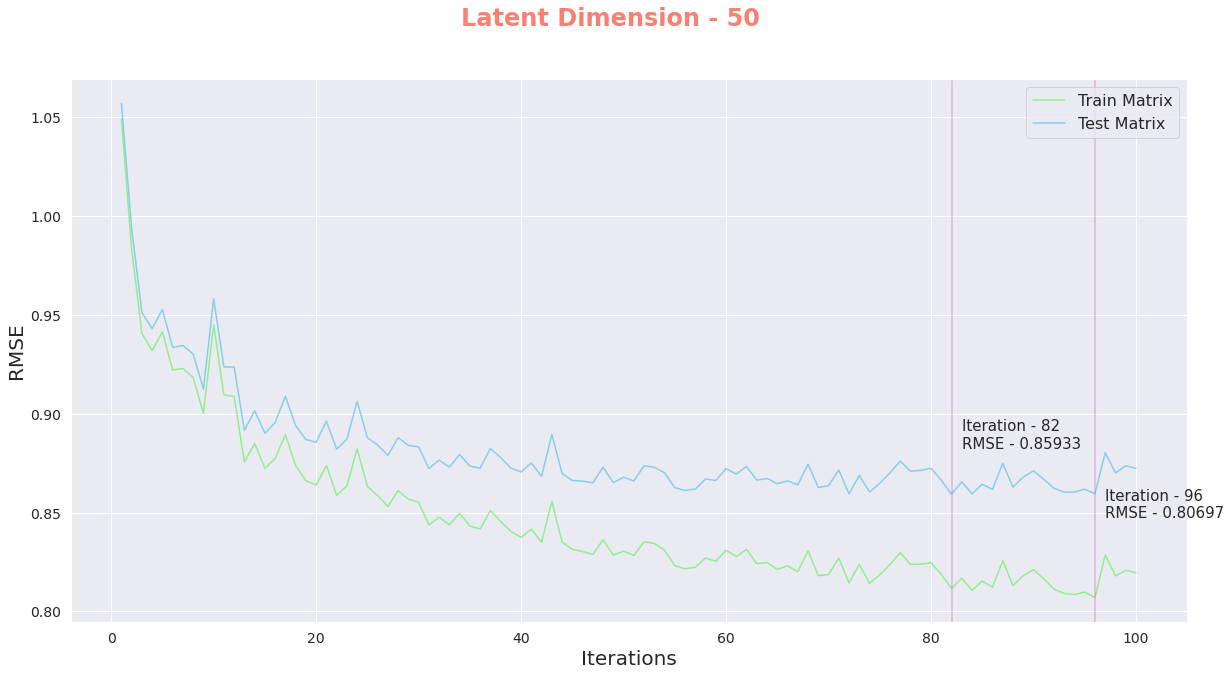

In [ ]:
plot_results(train_rmse=train_rmse_k_50, test_rmse=test_rmse_k_50, k_factor=50)

#### Latent Dimension - 100

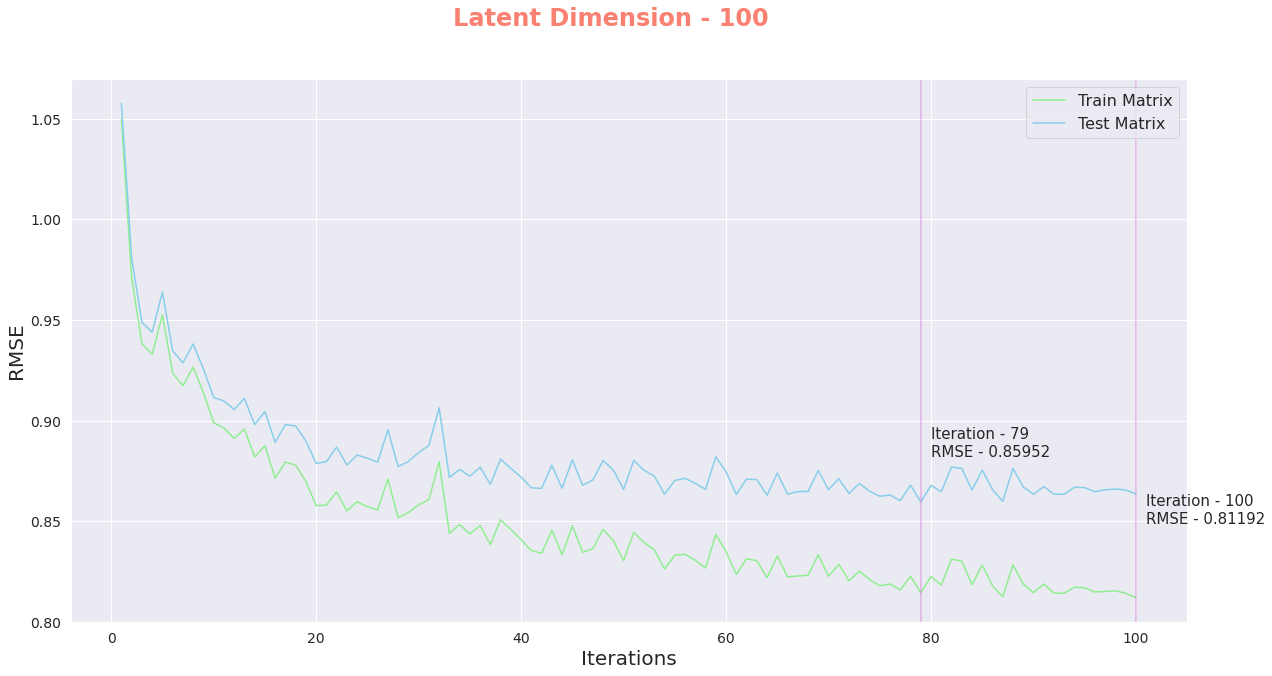

In [ ]:
plot_results(train_rmse=train_rmse_k_100, test_rmse=test_rmse_k_100, k_factor=100)

# Discussion

**Note** - We split differently the rating data so the seed of the random won't make the same effect as in the notebook you shared with us.

we have implemented 2 different approaches.
In the first one, we used SVD, and in the second, matrix factorization using stochastic gradient descent.

As we can see in the plot ("Find Best K") the best $K$ value is $55$ which gives us $2.214\sim RMSE$ we find this approach very fast comparing to MF but not that accurate, the best result we get is $2.214$ and we know that in our case RMSE range can be between $0$ to $5$, $0$ is when we have $100%$ accurate and $5$ is even more rare situation.

We can "achieve" $5$ only when all the rating is $0$ and their predictions are $5$ or all the rating are $5$ and their predictions are $0$ which it's not a likely scenario so $2.214$ is a pretty bad result but because it's so fast we can live with that.


In the second approach to this task, we used matrix factorization using stochastic gradient descent.

This way is more complex to implement and takes more time to train the model but it achieves much better results, around $0.85 RMSE$ which is way better than $2.2\sim RMSE$.

Usually, it is more accepted to use a proportion to train & test matrices and not fixed size (2500 ratings) so we did everything twice, once where the test matrix is 2500 and second where the test matrix is $20%$ of the ratings (around $200K$ ratings).

In our experiments, we used latent space of 20, 50, and 100. As we can see all of them around the same results, test $0.85\sim RMSE$ and train $0.8\sim RMSE$.
To understand why this method is so powerful let's do some calculations.

In total we have $6K\sim$ users & $4K\sim$ movies so we need $24M\sim$ cells! now we achieved good results with 20 dimensions so, we need only $6K \times 20 = 120K$ cells for users matrix and $4K \times 20 = 80K$ cells for movies matrix, total $200K$ cells. We can see significantly reduction in the space we need to operate this task $(\frac{200K}{24M} = \frac{1}{120})$.

We find the next explanation to be helpful to understand the latent space.
In our case, we have 20 dimensions, it's much easier to think of each of the columns in the movies latent matrix like how much of a specific movie is a specific category (animation, comedy, drama, etc') and in the user's latent matrix how much specific user likes a specific category.

Next, we tried differents of regularization and learning rates values. The best values we could find is $0.1$ for regularization and $0.01$ for learning rate. Regularization can be irrelevant in this solution, it just speeds up the process but the result will be the same without it, and as we said above the learning rate should be 0.01, if very small value then we can reach a local minimum and if it's too big we can just bounce around and missing the global minimum.

Another important thing to note is that we can see convergence clrealy around the 55~60 iterations, it's probably the best to break there but we wanted to see where it's going till 100 iterations.








In conclusion, there many ways to approach this kind of problem, some of them are easier to implement and some don't, some of them producing better results and some aren't.  A more advanced solution can be to split our ratings set to K sets and create K models and average their latent space, **the imagination is the limit!**